# Visualize Radar Wind Profile and SODAR Data

#### Use this notebook to plot wind profiler and SODAR data from WFIP3 sites in the Northeast.

In [1]:
#Data is read in and plotted using ACT.
from datetime import datetime, timedelta
import act
import matplotlib.pyplot as plt
import xarray as xr
import warnings
warnings.simplefilter('ignore')
#Input desired date.
#04/17/2024-05/15/2024 
yr=input('Year (yyyy):')
m=input('Month (mm):')
dd=input('Day (dd):')
fmt = '%Y.%m.%d'
date = f'{yr}.{m}.{dd}'
dt = datetime.strptime(date, fmt)
tt = dt.timetuple()
day_of_year = tt.tm_yday

Year (yyyy): 2024
Month (mm): 04
Day (dd): 25



The first site is a wind profiler at Cape Cod, MA.

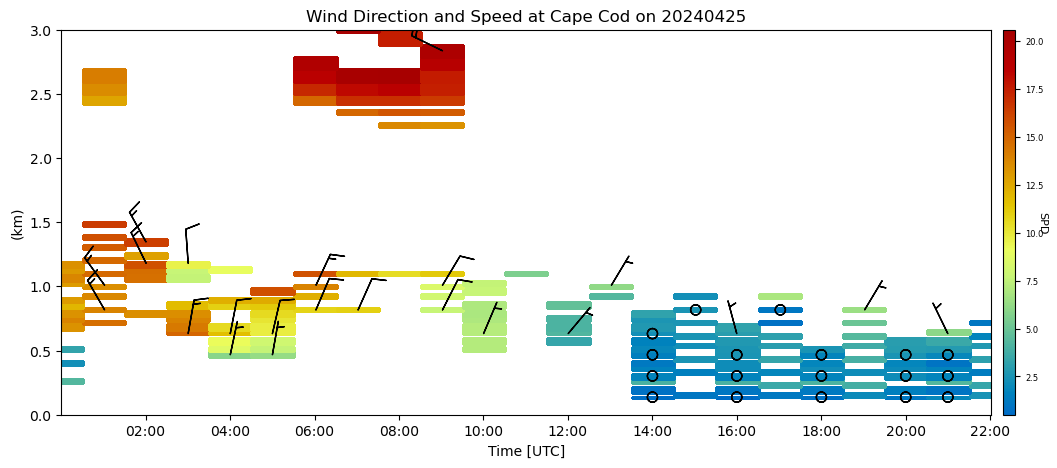

In [2]:
#Read in the Cape Cod data. 
ds1, ds2 = act.io.read_psl_wind_profiler(f"../data/caco-rwp-raw/caco.rwp.z01.00.{yr}{m}{dd}.000000.winds.cns", 
                                         transpose=False)

# Create an ACT TimeSeriesDisplay.
display = act.plotting.TimeSeriesDisplay(
    {'Wind Direction and Speed at Cape Cod': ds1}, subplot_shape=(1,), figsize=(12, 5)
)

# Plot speed with a wind barb overlay (0-3km), while using a color vision
# deficiency (CVD) colormap.
display.plot('SPD', subplot_index=(0,), 
             cvd_friendly=True
)
display.plot_barbs_from_spd_dir('SPD', 'DIR')
display.set_yrng([0, 3])
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_caco_rwp.png', bbox_inches='tight', dpi=150)

The second site is a wind profiler in southern Rhode Island.

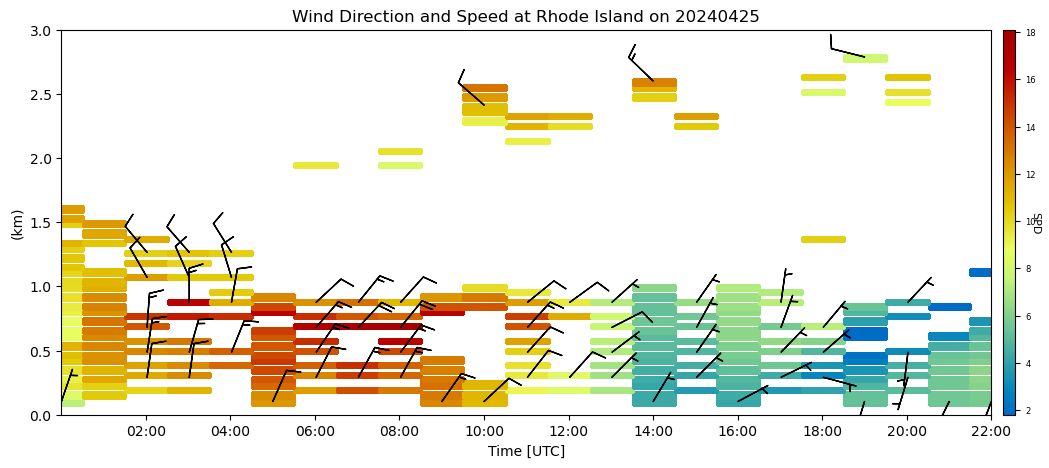

In [3]:
#Read in the Rhode Island Data.
ds3, ds4 = act.io.read_psl_wind_profiler(f"../data/rhod-rwp-raw/rhod.rwp.z01.00.{yr}{m}{dd}.000000.winds.cns", transpose=False)
# Create an ACT TimeSeriesDisplay.
display = act.plotting.TimeSeriesDisplay(
    {'Wind Direction and Speed at Rhode Island': ds3}, subplot_shape=(1,), figsize=(12, 5)
)

# Plot speed with a wind barb overlay (0-3km), while using a color vision
# deficiency (CVD) colormap.
display.plot('SPD', subplot_index=(0,), 
             cvd_friendly=True
            )
display.plot_barbs_from_spd_dir('SPD', 'DIR')
display.set_yrng([0, 3])
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_rhod_rwp.png', bbox_inches='tight', dpi=150)

The third site is the Sodar at Nantucket, MA.

<Axes: title={'center': 'Shear, Wind Direction, and Speed at Nantucket Sodar on 20240425'}, xlabel='Time [UTC]', ylabel='(m)'>

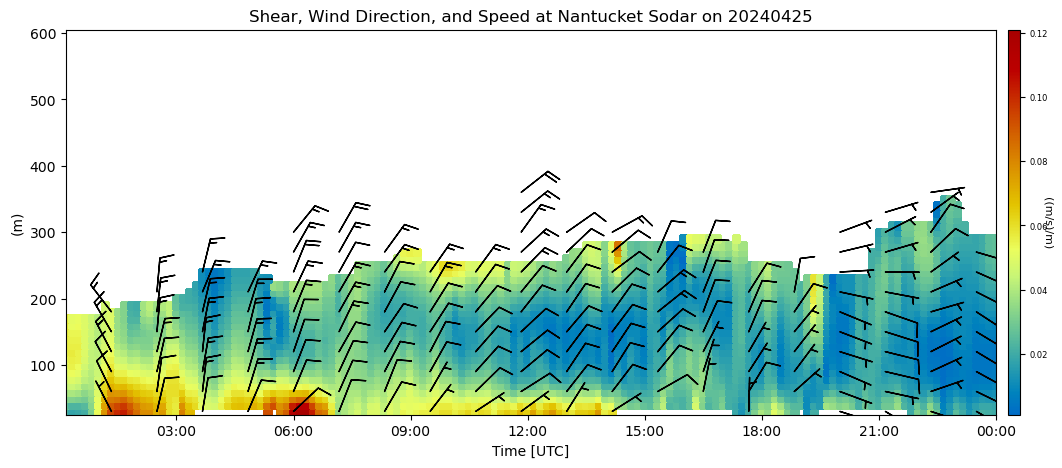

In [4]:
# Call the read_sodar function.
# More information on the sodar can be found here:
# https://www.scintec.com/products/flat-array-sodar-mfas/
ds5 = act.io.read_mfas_sodar(f'../data/nant-sodar-raw/nant.sodar.z01.00.{yr}{m}{dd}.000000.mnd')

# Create an ACT TimeSeriesDisplay.
display = act.plotting.TimeSeriesDisplay(
    {'Shear, Wind Direction, and Speed at Nantucket Sodar': ds5}, subplot_shape=(1,), figsize=(12, 5)
)

# Plot shear with a wind barb overlay, while using a color vision
# deficiency (CVD) colormap.
display.plot('shear', subplot_index=(0,), cvd_friendly=True)
display.plot_barbs_from_spd_dir('speed', 'dir')

The fourth site is a wind profiler at Nantucket, MA.  This cell will take a bit longer to run.

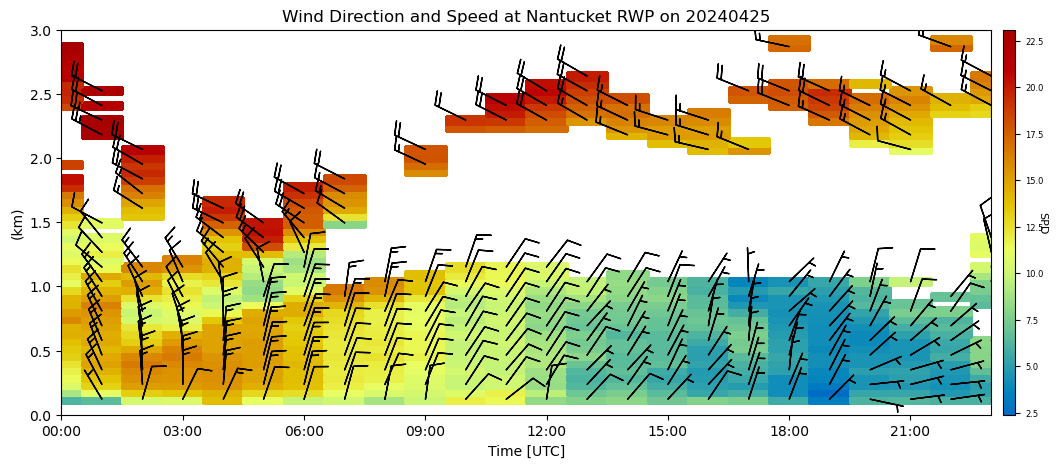

In [5]:
#Read in the Nantucket data.
nte_files=[]
#Each file returns two datasets, we will only use the first one from each
nte_correct_files=[]
nte_time=[]
for a in range(0, 10):
    nte_files.append(act.io.read_psl_wind_profiler(f"https://downloads.psl.noaa.gov/psd2/data/realtime/Radar915/WwWind/nte/{yr}/{day_of_year}/nte{int(yr)-2000}{day_of_year}.0{a}w", 
                                         transpose=False))
    nte_correct_files.append(nte_files[a][0])
    nte_time.append(nte_correct_files[a].time.values[0])
for a in range(10, 24):
    nte_files.append(act.io.read_psl_wind_profiler(f"https://downloads.psl.noaa.gov/psd2/data/realtime/Radar915/WwWind/nte/{yr}/{day_of_year}/nte{int(yr)-2000}{day_of_year}.{a}w", 
                                         transpose=False))
    nte_correct_files.append(nte_files[a][0])
    nte_time.append(nte_correct_files[a].time.values[0])
    
#Combine datasets
nte_data = xr.concat(nte_correct_files, dim=nte_time)

#Create a new 2D dataset using the values from the combined dataset.
#The combined dataset will not plot on its own because it has 3 dimensions
nte_SPD=[]
nte_DIR=[]
for b in range(0, 24):
    nte_SPD.append(nte_data.SPD[b].values[b])
    nte_DIR.append(nte_data.DIR[b].values[b])

ds6 = xr.Dataset(
    data_vars=dict(
        SPD = (["time", "HT"], nte_SPD),
        DIR = (["time", "HT"], nte_DIR),
    ),
    coords=dict(
        time = nte_time,
        HT = nte_data.HT
    ))

#Create an ACT TimeSeriesDisplay.
display = act.plotting.TimeSeriesDisplay(
    {'Wind Direction and Speed at Nantucket RWP': ds6}, subplot_shape=(1,), figsize=(12, 5)
)

# Plot speed with a wind barb overlay (0-3km), while using a color vision
# deficiency (CVD) colormap.
display.plot('SPD', subplot_index=(0,), 
             cvd_friendly=True
            )
display.plot_barbs_from_spd_dir('SPD', 'DIR')
display.set_yrng([0, 3])
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_nant_rwp.png', bbox_inches='tight', dpi=150)

The fifth site is a wind profiler at Block Island, RI.  This cell will take a bit longer to run.

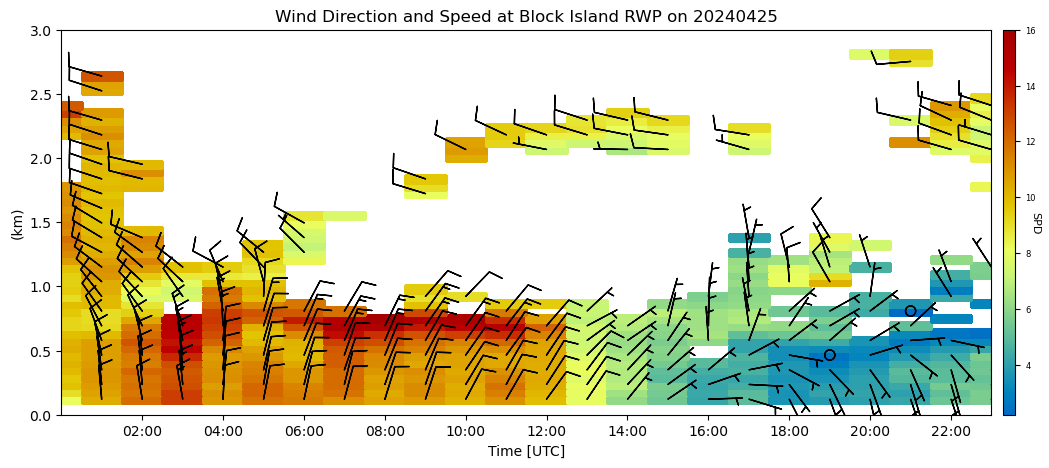

In [6]:
#Read in the Block Island Data.
#We will go through the same steps as with the Nantucket RWP data
bid_files=[]
bid_correct_files=[]
bid_time=[]
for a in range(0, 10):
    bid_files.append(act.io.read_psl_wind_profiler(f"https://downloads.psl.noaa.gov/psd2/data/realtime/Radar915/WwWind/bid/{yr}/{day_of_year}/bid{int(yr)-2000}{day_of_year}.0{a}w", 
                                         transpose=False))
    bid_correct_files.append(bid_files[a][0])
    bid_time.append(bid_correct_files[a].time.values[0])
for a in range(10, 24):
    bid_files.append(act.io.read_psl_wind_profiler(f"https://downloads.psl.noaa.gov/psd2/data/realtime/Radar915/WwWind/bid/{yr}/{day_of_year}/bid{int(yr)-2000}{day_of_year}.{a}w", 
                                         transpose=False))
    bid_correct_files.append(bid_files[a][0])
    bid_time.append(bid_correct_files[a].time.values[0])

#Combine again
bid_data = xr.concat(bid_correct_files, dim=bid_time)

#2D dataset
bid_SPD=[]
bid_DIR=[]
for b in range(0, 24):
    bid_SPD.append(bid_data.SPD[b].values[b])
    bid_DIR.append(bid_data.DIR[b].values[b])

ds7 = xr.Dataset(
    data_vars=dict(
        SPD = (["time", "HT"], bid_SPD),
        DIR = (["time", "HT"], bid_DIR),
    ),
    coords=dict(
        time = bid_time,
        HT = bid_data.HT
    ))

#Create an ACT TimeSeriesDisplay.
display = act.plotting.TimeSeriesDisplay(
    {'Wind Direction and Speed at Block Island RWP': ds7}, subplot_shape=(1,), figsize=(12, 5)
)

# Plot speed with a wind barb overlay (0-3km), while using a color vision
# deficiency (CVD) colormap.
display.plot('SPD', subplot_index=(0,), 
             cvd_friendly=True
            )
display.plot_barbs_from_spd_dir('SPD', 'DIR')
display.set_yrng([0, 3])
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_block_rwp.png', bbox_inches='tight', dpi=150)

### Data Sources

Cape Cod Data:

Atmosphere to Electrons (A2e). 2024. wfip3/caco.rwp.z01.00. Maintained by A2e Data Archive and Portal for U.S. Department of Energy, Office of Energy Efficiency and Renewable Energy. DOI: 10.21947/2280917. Accessed: 28 06 2024.

Sodar Data:

Atmosphere to Electrons (A2e). 2024. wfip3/nant.sodar.z01.00. Maintained by A2e Data Archive and Portal for U.S. Department of Energy, Office of Energy Efficiency and Renewable Energy. DOI: 10.21947/2234008. Accessed: 28 06 2024.

Rhode Island Data:

Atmosphere to Electrons (A2e). 2024. wfip3/rhod.rwp.z01.00. Maintained by A2e Data Archive and Portal for U.S. Department of Energy, Office of Energy Efficiency and Renewable Energy. DOI: 10.21947/2229548. Accessed: 28 06 2024.

Block Island Data:

Physical Sciences Laboratory, NOAA. (2023, November 9). NOAA PSL Block Island Radar Wind Profiler Data. Boulder, CO: 325 Broadway. https://downloads.psl.noaa.gov/psd2/data/realtime/Radar915/WwWind/bid/ Accessed 28 06, 2024.

Nantucket RWP Data:

Physical Sciences Laboratory, NOAA. (2023, November 9). NOAA PSL Nantucket Radar Wind Profiler Data. Boulder, CO: 325 Broadway. https://downloads.psl.noaa.gov/psd2/data/realtime/Radar915/WwWind/nte/ Accessed 28 06, 2024.